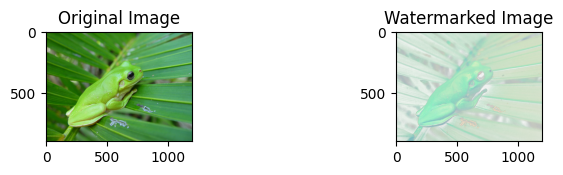

Text message hidden and decoded successfully: Hello, this is a hidden message!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [12]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

def text_to_binary(text):
    binary_message = ''.join(format(ord(char), '08b') for char in text)
    return binary_message

def binary_to_text(binary_message):
    text = ''.join([chr(int(binary_message[i:i+8], 2)) for i in range(0, len(binary_message), 8)])
    return text

# Read the host image
host = cv2.imread('original.jpg')
m, n, p = host.shape

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(host, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Perform DWT on the host image using Haar wavelet
coeffs_host = pywt.dwt2(host, 'haar')
host_LL, (host_LH, host_HL, host_HH) = coeffs_host

# Encode text message
text_message = "Hello, this is a hidden message!"
binary_message = text_to_binary(text_message)

# Ensure the binary message can fit into the host image
if len(binary_message) > m * n:
    raise ValueError("Text message is too long to be hidden in the image")

# Convert binary message to an array of integers
binary_array = np.array(list(binary_message), dtype=int)

# Ensure the binary message can fit into the host image
if len(binary_message) > host_LL.size:
    raise ValueError("Text message is too long to be hidden in the image")

# Convert binary message to an array of integers
binary_array = np.array(list(binary_message), dtype=int)

# Pad the binary array if necessary to match the size of host_LL
padding_size = host_LL.size - len(binary_array)
binary_array = np.concatenate((binary_array, np.zeros(padding_size, dtype=int)))

# Reshape the binary array to the shape of host_LL
binary_array = binary_array.reshape(host_LL.shape)

# Watermark the host image
watermarked_LL = host_LL + (0.03 * binary_array)
watermarked = pywt.idwt2((watermarked_LL, (host_LH, host_HL, host_HH)), 'haar')

# Display watermarked image
plt.subplot(1, 3, 3)
plt.imshow(np.uint8(watermarked))
plt.title('Watermarked Image')

# Save the watermarked image
# cv2.imwrite('Watermarked_text.png', cv2.cvtColor(np.uint8(watermarked), cv2.COLOR_RGB2BGR))
cv2.imwrite('Watermarked_text.png', np.uint8(watermarked))

# Show the plots
plt.show()

# Decode the hidden message
decoded_binary_message = (watermarked_LL - host_LL) / 0.03
decoded_binary_message = decoded_binary_message.flatten().astype(int)
decoded_text_message = binary_to_text(''.join(map(str, decoded_binary_message)))

y = 'Text message hidden and decoded successfully: {}'.format(decoded_text_message)
print(y)